In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import sqlite3
import pickle

In [3]:
# Global variables
dbPath = "../database"

# Collecting the data
# Specify the con
con = sqlite3.connect(f'{dbPath}/db.sqlite3')
# Convert to DataFrame
df = pd.read_sql('SELECT * FROM clean', con=con)

# doublecheck
df.describe()

,genetic,exercise,smoking,alcohol,lifespan,sugar,bmi
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,82.278624,2.403477,9.809035,2.266846,80.177693,6.487169,27.682023
std,7.441333,1.170426,6.918614,1.801044,7.840508,2.708622,8.711736
min,63.900000,0.100000,0.000000,0.000000,57.000000,0.700000,11.320000
25%,77.600000,1.500000,3.375000,0.600000,75.000000,4.400000,20.937500
50%,81.800000,2.200000,9.500000,1.700000,79.700000,6.300000,26.475000
75%,86.700000,3.200000,15.900000,4.000000,85.200000,8.400000,33.207500
max,102.200000,5.500000,22.200000,6.000000,105.100000,13.800000,65.870000


In [47]:
con.close()

In [4]:
# create x and y
x = df.drop(columns='lifespan')
y = df['lifespan']

x.head()

,genetic,exercise,smoking,alcohol,sugar,bmi
0,73.9,0.9,0.0,2.4,6.9,29.13
1,86.0,1.8,8.1,0.4,4.2,35.63
2,83.3,1.1,0.8,4.6,7.5,35.96
3,82.8,4.7,11.8,1.0,2.9,41.42
4,78.7,1.5,8.3,4.9,5.5,22.60


In [5]:
y.head()

0    73.1
1    85.0
2    81.6
3    81.0
4    75.0
Name: lifespan, dtype: float64

In [48]:
# split the data 30% - 70%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [49]:
# apply linear regression
regr_ = DecisionTreeRegressor(max_depth=8)

regr_.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [50]:
# train the data
y_pred_test = regr_.predict(x_test)

y_pred_test

array([75.9547619 , 78.8       , 84.02340426, ..., 66.76666667,
       78.472     , 75.5       ])

In [51]:
df_results = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
df_results

,Real Values,Predicted Values
2193,76.3,75.954762
2450,78.7,78.800000
2166,85.5,84.023404
2773,99.7,98.388889
2457,84.8,83.371429
...,...,...
446,80.1,78.600000
2063,80.5,80.066667
2230,65.9,66.766667
3471,79.8,78.472000


<function matplotlib.pyplot.show(close=None, block=None)>

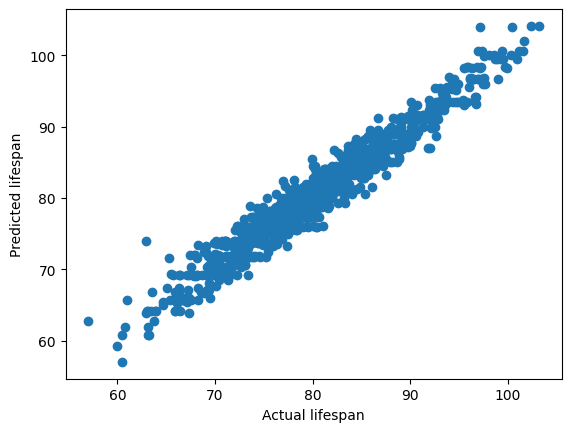

In [52]:
# plot the result
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show